# Data Preprocessing

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('heart.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


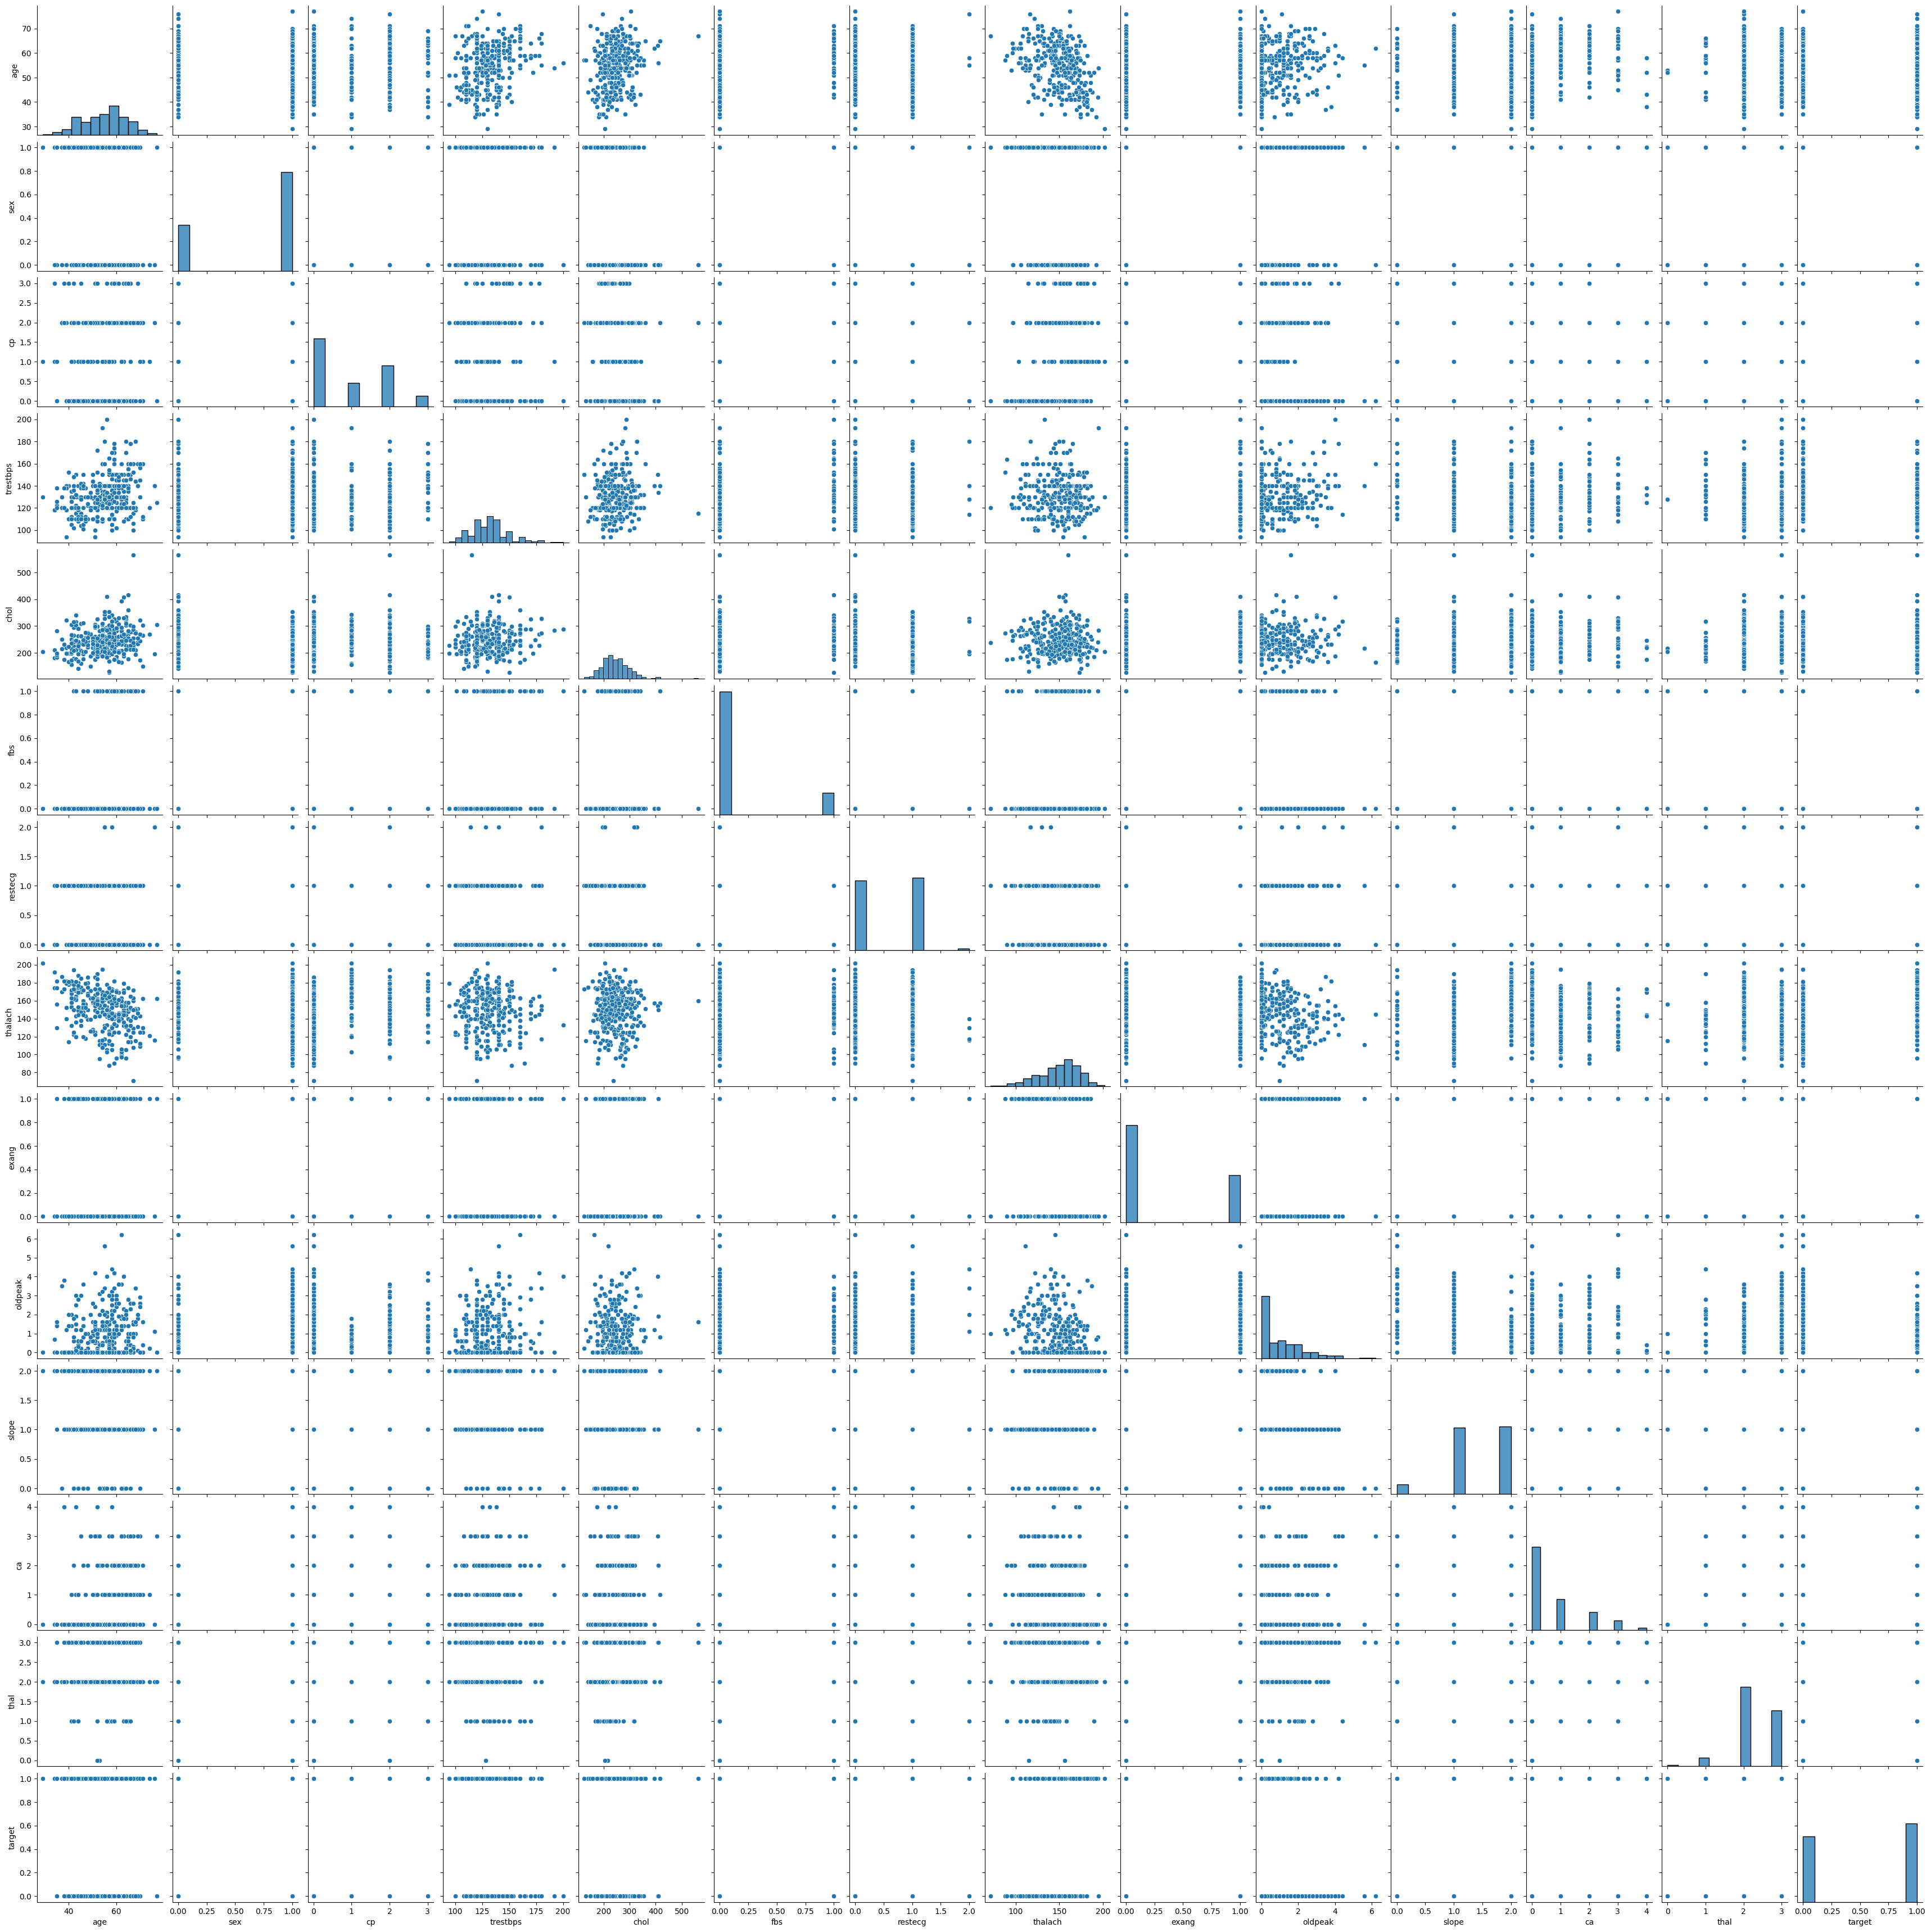

In [6]:
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 15)
sns.pairplot(dataset)

<ipython-input-7-4fd966812275>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['age'])


Text(0.5, 1.0, 'Distribution of Age')

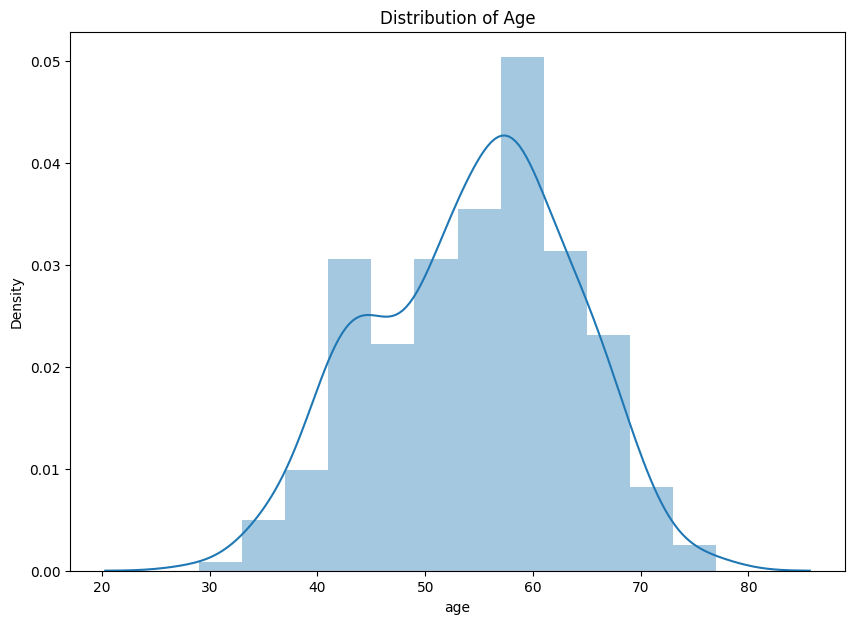

In [7]:
plt.rcParams['figure.figsize'] = (10, 7)
sns.distplot(dataset['age'])
plt.title('Distribution of Age')

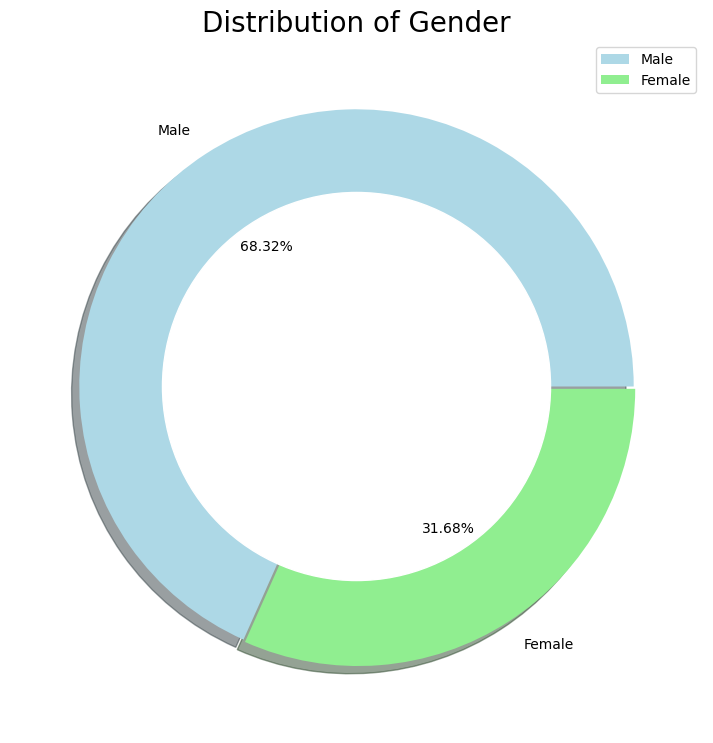

In [8]:
size = [207, 96]
colors = ['lightblue', 'lightgreen']
labels = "Male", "Female"
explode = [0, 0.01]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Distribution of Gender', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

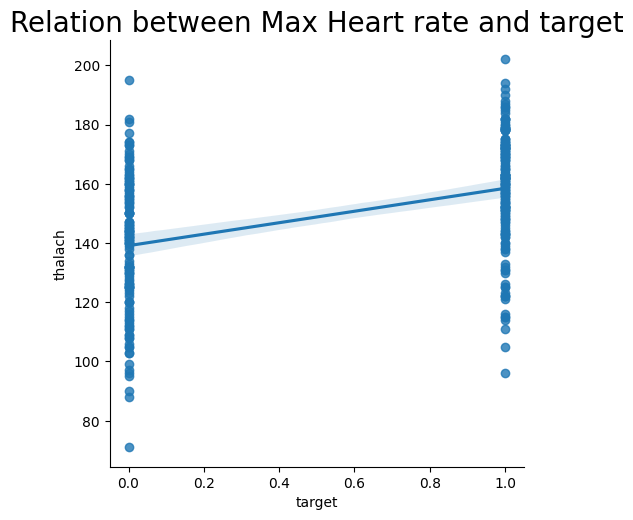

In [9]:
plt.rcParams['figure.figsize'] = (10, 7)
sns.lmplot(x='target', y='thalach', data=dataset)
plt.title('Relation between Max Heart rate and target', fontsize=20)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Training the Model

In [12]:
from sklearn.naive_bayes import GaussianNB
classifier_GaussianNB = GaussianNB()
classifier_GaussianNB.fit(X_train, y_train)

GaussianNB()

In [37]:
y_pred_GaussianNB = classifier_GaussianNB.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_GaussianNB)
print(cm)
accuracy_score(y_test, y_pred_GaussianNB)

[[24  9]
 [ 4 39]]


0.8289473684210527

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
y_pred_KNN = classifier_KNN.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_KNN)
print(cm)
accuracy_score(y_test, y_pred_KNN)

[[23 10]
 [ 4 39]]


0.8157894736842105

In [19]:
from sklearn.svm import SVC
classifier_SVC = SVC(kernel = 'linear', random_state = 0)
classifier_SVC.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [39]:
y_pred_SVC = classifier_SVC.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_SVC)
print(cm)
accuracy_score(y_test, y_pred_SVC)

[[24  9]
 [ 2 41]]


0.8552631578947368

In [23]:
from sklearn.svm import SVC
classifier_kernel = SVC(kernel = 'rbf', random_state = 0)
classifier_kernel.fit(X_train, y_train)

SVC(random_state=0)

In [26]:
y_pred_kernel = classifier_SVC.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_kernel)
print(cm)
accuracy_score(y_test, y_pred_kernel)

[[24  9]
 [ 2 41]]


0.8552631578947368

In [27]:
from sklearn.tree import DecisionTreeClassifier
classifier_decision = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_decision.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [30]:
y_pred_decision = classifier_decision.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_decision)
print(cm)
accuracy_score(y_test, y_pred_decision)

[[24  9]
 [ 6 37]]


0.8026315789473685

In [31]:
from sklearn.ensemble import RandomForestClassifier
classifier_random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_random.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

# Analysing the Results






[[24  9]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        33
           1       0.81      0.91      0.86        43

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76



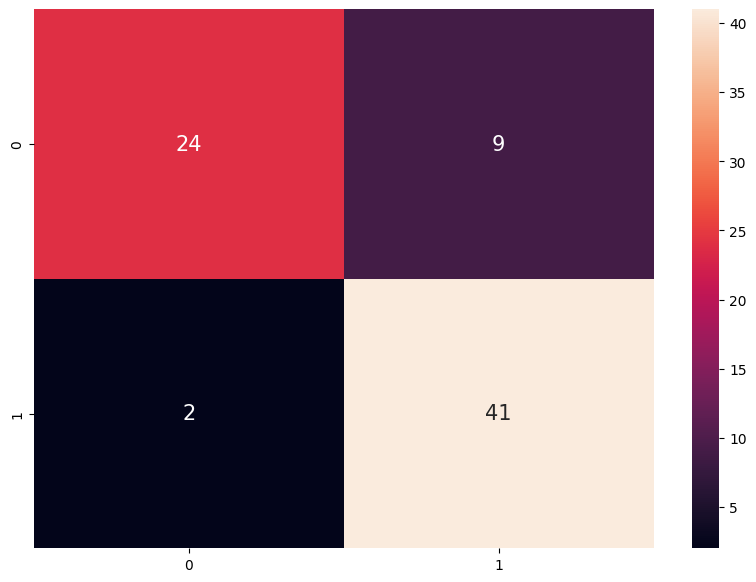

In [40]:
y_pred_random = classifier_random.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred_SVC)
print(cm)
accuracy_score(y_test, y_pred_random)
sns.heatmap(cm, annot = True, annot_kws = {'size':15})
cr = classification_report(y_test, y_pred_random)
print(cr)

AUC Score : 0.8403805496828752


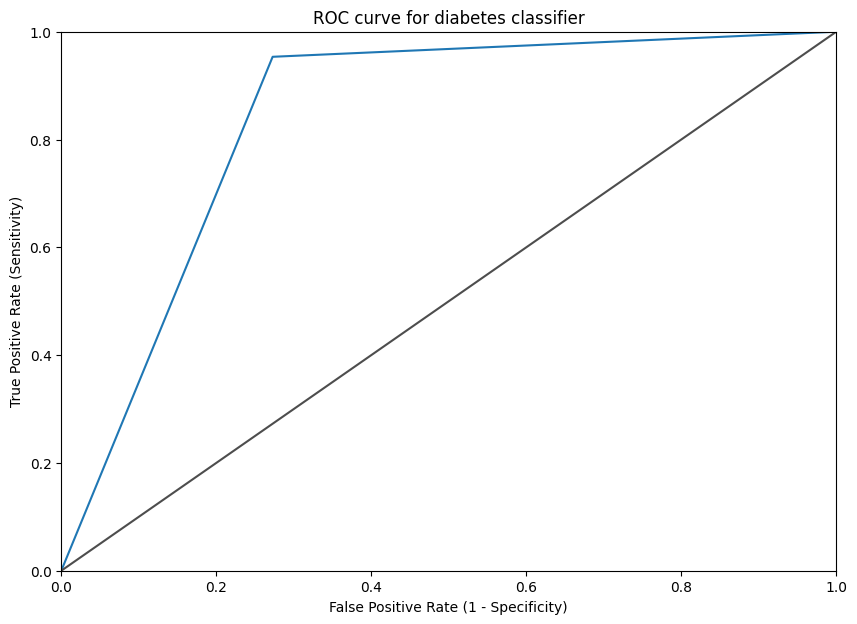

In [36]:

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_SVC)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
from sklearn.metrics import auc
auc = auc(fpr, tpr)
print("AUC Score :", auc)